In [1]:
import pandas as pd
import requests
import json
import numpy as np
from numpy import mean
import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as ul

### Upload PartD + LEIE

In [2]:
# Load partD dataset
partD = pd.read_csv("partD.csv", encoding="ISO-8859-1")

/Users/buynow/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Load LEIE dataset
leie = pd.read_csv("LEIE.csv", encoding="ISO-8859-1")

/Users/buynow/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
# Load partD datasets from all years
partD_all = pd.read_csv("partD_all.csv")

/Users/buynow/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
partD_all.shape

(23645873, 22)

### Visualize PartD

In [4]:
partD.head(10)

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,...,360,150.76,NaN,NaN,13.0,13.0,150.76,360.0,*,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,...,780,92.81,12.0,NaN,22.0,26.0,92.81,780.0,NaN,12.0
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,...,1482,373.60,22.0,NaN,41.0,50.0,373.60,1482.0,NaN,22.0
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Azithromycin,Azithromycin,...,77,132.57,15.0,#,NaN,NaN,NaN,NaN,#,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Carvedilol,Carvedilol,...,787,118.53,11.0,NaN,21.0,27.0,118.53,787.0,NaN,11.0
5,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Cefdinir,Cefdinir,...,81,203.03,13.0,#,NaN,NaN,NaN,NaN,#,NaN
6,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Clopidogrel,Clopidogrel Bisulfate,...,930,172.04,11.0,NaN,26.0,31.0,172.04,930.0,NaN,11.0
7,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Doxycycline Hyclate,Doxycycline Hyclate,...,91,209.66,13.0,*,NaN,NaN,NaN,NaN,*,NaN
8,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Eliquis,Apixaban,...,462,7234.67,NaN,#,NaN,NaN,NaN,NaN,*,NaN
9,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Furosemide,Furosemide,...,314,40.25,NaN,*,NaN,NaN,NaN,NaN,*,NaN


In [5]:
partD.shape

(25401870, 22)

In [6]:
partD.describe()

,Prscrbr_NPI,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes
count,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,1.070614e+07,1.402100e+07,1.402100e+07,1.402100e+07,1.402100e+07,2.589094e+06
mean,1.499506e+09,5.097666e+01,8.669875e+01,2.433167e+03,5.394291e+03,3.012260e+01,4.962052e+01,8.759334e+01,4.886409e+03,2.487666e+03,3.333644e+01
std,2.877596e+08,1.272163e+02,1.845877e+02,4.700585e+03,3.749361e+04,1.039127e+02,1.488382e+02,2.084941e+02,3.666938e+04,5.024198e+03,1.961413e+02
min,1.003000e+09,1.100000e+01,1.100000e+01,1.000000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245673e+09,1.500000e+01,2.100000e+01,4.800000e+02,2.621900e+02,1.400000e+01,1.300000e+01,1.800000e+01,2.248300e+02,4.250000e+02,1.300000e+01
50%,1.497925e+09,2.400000e+01,3.800000e+01,1.020000e+03,6.713800e+02,2.000000e+01,2.200000e+01,3.600000e+01,6.200600e+02,9.900000e+02,1.900000e+01
75%,1.740720e+09,5.000000e+01,8.200000e+01,2.310000e+03,2.161750e+03,3.300000e+01,4.700000e+01,8.000000e+01,2.035420e+03,2.250000e+03,3.400000e+01
max,1.993000e+09,1.993870e+05,2.047677e+05,6.066460e+05,3.343712e+07,1.418610e+05,1.906370e+05,1.957407e+05,3.196401e+07,5.928350e+05,1.355460e+05


# Data Cleaning

In [7]:
list(partD.columns)

['Prscrbr_NPI',
 'Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Sprsn_Flag',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Bene_Sprsn_Flag',
 'GE65_Tot_Benes']

In [8]:
## Only include useful variables
partD = partD[['Prscrbr_NPI',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes']]

In [9]:
partD.dtypes

Prscrbr_NPI           int64
Prscrbr_Type         object
Prscrbr_Type_Src     object
Brnd_Name            object
Gnrc_Name            object
Tot_Clms              int64
Tot_30day_Fills     float64
Tot_Day_Suply         int64
Tot_Drug_Cst        float64
Tot_Benes           float64
dtype: object

### Missing value detection

In [10]:
partD.isnull().sum(axis=0)

Prscrbr_NPI                0
Prscrbr_Type               2
Prscrbr_Type_Src           0
Brnd_Name                  0
Gnrc_Name                  0
Tot_Clms                   0
Tot_30day_Fills            0
Tot_Day_Suply              0
Tot_Drug_Cst               0
Tot_Benes           14695728
dtype: int64

*** We have 2 prscrbr_type and 14695728 Tot_Benes are null.

### Change Null Tot_Benes to 5

In [11]:
partD.head(5)

,Prscrbr_NPI,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes
0,1003000126,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,13,13.0,360,150.76,NaN
1,1003000126,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,22,26.0,780,92.81,12.0
2,1003000126,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,41,50.0,1482,373.60,22.0
3,1003000126,Internal Medicine,S,Azithromycin,Azithromycin,15,15.0,77,132.57,15.0
4,1003000126,Internal Medicine,S,Carvedilol,Carvedilol,21,27.0,787,118.53,11.0


In [12]:
partD_x = partD.copy()

In [13]:
partD_x["Tot_Benes"].fillna(5, inplace = True)

In [14]:
partD_x.head(10)

,Prscrbr_NPI,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes
0,1003000126,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,13,13.0,360,150.76,5.0
1,1003000126,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,22,26.0,780,92.81,12.0
2,1003000126,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,41,50.0,1482,373.60,22.0
3,1003000126,Internal Medicine,S,Azithromycin,Azithromycin,15,15.0,77,132.57,15.0
4,1003000126,Internal Medicine,S,Carvedilol,Carvedilol,21,27.0,787,118.53,11.0
5,1003000126,Internal Medicine,S,Cefdinir,Cefdinir,13,13.0,81,203.03,13.0
6,1003000126,Internal Medicine,S,Clopidogrel,Clopidogrel Bisulfate,26,31.0,930,172.04,11.0
7,1003000126,Internal Medicine,S,Doxycycline Hyclate,Doxycycline Hyclate,13,13.0,91,209.66,13.0
8,1003000126,Internal Medicine,S,Eliquis,Apixaban,15,17.0,462,7234.67,5.0
9,1003000126,Internal Medicine,S,Furosemide,Furosemide,11,12.0,314,40.25,5.0


In [15]:
partD_x.isnull().sum(axis=0)

Prscrbr_NPI         0
Prscrbr_Type        2
Prscrbr_Type_Src    0
Brnd_Name           0
Gnrc_Name           0
Tot_Clms            0
Tot_30day_Fills     0
Tot_Day_Suply       0
Tot_Drug_Cst        0
Tot_Benes           0
dtype: int64

In [16]:
## Drop the rows including missing vlaues in "Prscrbr_Type" column
partD_x = partD_x.dropna(axis = 0, subset = ["Prscrbr_Type"])
partD_x.isnull().sum(axis=0)

Prscrbr_NPI         0
Prscrbr_Type        0
Prscrbr_Type_Src    0
Brnd_Name           0
Gnrc_Name           0
Tot_Clms            0
Tot_30day_Fills     0
Tot_Day_Suply       0
Tot_Drug_Cst        0
Tot_Benes           0
dtype: int64

In [17]:
partD_x.dtypes

Prscrbr_NPI           int64
Prscrbr_Type         object
Prscrbr_Type_Src     object
Brnd_Name            object
Gnrc_Name            object
Tot_Clms              int64
Tot_30day_Fills     float64
Tot_Day_Suply         int64
Tot_Drug_Cst        float64
Tot_Benes           float64
dtype: object

### Invalid NPI detection

/Users/buynow/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


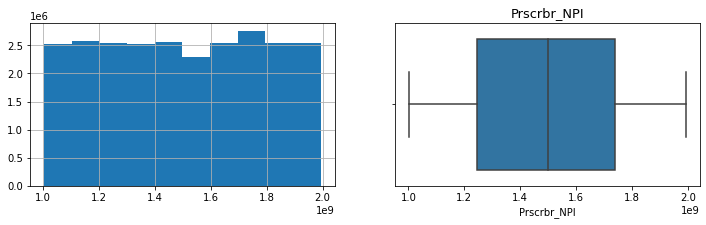

In [18]:
# Check the invalid NPI
# outliers can be invlid NPI 
plt.figure(figsize=(12,3))

plt.subplot(121)
partD_x["Prscrbr_NPI"].hist();

plt.subplot(122)
sns.boxplot('Prscrbr_NPI', data=partD_x)
plt.title('Prscrbr_NPI', fontsize=13);

# Data grouping

In [19]:
partD_x.head(5)

,Prscrbr_NPI,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes
0,1003000126,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,13,13.0,360,150.76,5.0
1,1003000126,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,22,26.0,780,92.81,12.0
2,1003000126,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,41,50.0,1482,373.60,22.0
3,1003000126,Internal Medicine,S,Azithromycin,Azithromycin,15,15.0,77,132.57,15.0
4,1003000126,Internal Medicine,S,Carvedilol,Carvedilol,21,27.0,787,118.53,11.0


In [70]:
x_var = ["Prscrbr_NPI", "Prscrbr_Type", "Prscrbr_Type_Src", "Brnd_Name", "Gnrc_Name", "Tot_Clms", "Tot_30day_Fills", 
         "Tot_Day_Suply", "Tot_Drug_Cst", "Tot_Benes"]
group_by = ["Prscrbr_NPI", "Prscrbr_Type"]
cont_var = ["Tot_Clms", "Tot_30day_Fills", "Tot_Day_Suply", "Tot_Drug_Cst", "Tot_Benes"]
stat_col = ["mean", "sum", "median", "std", "min", "max"]

# group the dateset by the list "group_by" adding statistics ("stat_col") with the continuous variables in the list "cont_var"
partD_new = partD_x[x_var].groupby(group_by, as_index = False).agg({"Tot_Clms":stat_col,
                                                                  "Tot_30day_Fills":stat_col,
                                                                  "Tot_Day_Suply":stat_col,
                                                                  "Tot_Drug_Cst":stat_col,
                                                                  "Tot_Benes":stat_col})

In [71]:
partD_new.head(5)

Prscrbr_NPI             Prscrbr_Type   Tot_Clms                             \
                                             mean  sum median        std min   
0  1003000126        Internal Medicine  18.666667  336   15.0   8.317239  11   
1  1003000142           Anesthesiology  60.750000  972   34.5  61.505013  13   
2  1003000167                  Dentist  21.500000   43   21.5  10.606602  14   
3  1003000282       Nurse Practitioner  12.000000   12   12.0        NaN  12   
4  1003000423  Obstetrics & Gynecology  17.666667  106   17.0   6.022181  11   

       Tot_30day_Fills          ... Tot_Drug_Cst                       \
   max            mean     sum  ...       median          std     min   
0   41       22.500000   405.0  ...      150.980  1671.251796   40.25   
1  249       64.193750  1027.1  ...      833.055  6232.854718   99.18   
2   29       21.500000    43.0  ...       84.745     6.512453   80.14   
3   12       14.000000    14.0  ...       95.030          NaN   95.03   
4   25       28.416667   170.5  ...      619.985  3704.954292  172.77   

             Tot_Benes                                        
        max       mean    sum median        std   min    max  
0   7234.67  11.722222  211.0   11.5   6.631525   5.0   30.0  
1  25818.67  26.812500  429.0   17.0  25.667668   5.0  105.0  
2     89.35  18.000000   36.0   18.0   7.071068  13.0   23.0  
3     95.03   5.000000    5.0    5.0        NaN   5.0    5.0  
4   9592.06   6.000000   36.0    5.0   2.449490   5.0   11.0  

[5 rows x 32 columns]

In [72]:
# There are null values in every standard deviation variable
# the null values are produced because the procedures were performed only once within the given year (2019)
partD_new.isnull().sum(axis=0)

Prscrbr_NPI                     0
Prscrbr_Type                    0
Tot_Clms         mean           0
                 sum            0
                 median         0
                 std       159230
                 min            0
                 max            0
Tot_30day_Fills  mean           0
                 sum            0
                 median         0
                 std       159230
                 min            0
                 max            0
Tot_Day_Suply    mean           0
                 sum            0
                 median         0
                 std       159230
                 min            0
                 max            0
Tot_Drug_Cst     mean           0
                 sum            0
                 median         0
                 std       159230
                 min            0
                 max            0
Tot_Benes        mean           0
                 sum            0
                 median         0
              

In [73]:
# Replace the null values with 0
partD_new = partD_new.fillna(0)
partD_new.isnull().sum(axis=0)

Prscrbr_NPI                0
Prscrbr_Type               0
Tot_Clms         mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_30day_Fills  mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_Day_Suply    mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_Drug_Cst     mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
Tot_Benes        mean      0
                 sum       0
                 median    0
                 std       0
                 min       0
                 max       0
dtype: int64

In [74]:
# Rename the columns 
partD_new.columns = ["".join(x) for x in partD_new.columns.ravel()]

In [75]:
partD_new.columns

Index(['Prscrbr_NPI', 'Prscrbr_Type', 'Tot_Clmsmean', 'Tot_Clmssum',
       'Tot_Clmsmedian', 'Tot_Clmsstd', 'Tot_Clmsmin', 'Tot_Clmsmax',
       'Tot_30day_Fillsmean', 'Tot_30day_Fillssum', 'Tot_30day_Fillsmedian',
       'Tot_30day_Fillsstd', 'Tot_30day_Fillsmin', 'Tot_30day_Fillsmax',
       'Tot_Day_Suplymean', 'Tot_Day_Suplysum', 'Tot_Day_Suplymedian',
       'Tot_Day_Suplystd', 'Tot_Day_Suplymin', 'Tot_Day_Suplymax',
       'Tot_Drug_Cstmean', 'Tot_Drug_Cstsum', 'Tot_Drug_Cstmedian',
       'Tot_Drug_Cststd', 'Tot_Drug_Cstmin', 'Tot_Drug_Cstmax',
       'Tot_Benesmean', 'Tot_Benessum', 'Tot_Benesmedian', 'Tot_Benesstd',
       'Tot_Benesmin', 'Tot_Benesmax'],
      dtype='object')

# Labeling

In [25]:
leie.head(10)

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,20200319,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
5,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN
6,NaN,NaN,,1ST REHABILITATION OF PORT ST,MANAGEMENT SVCS CO,NaN,NaN,0,NaN,C/O 3659 MAGUIRE BLVD,ORLANDO,FL,32803,1128b8,20020919,0,0,NaN
7,NaN,NaN,,2001 BATH AVENUE PHARMACY INC,OTHER BUSINESS,PHARMACY,NaN,0,NaN,2001 BATH AVENUE,BROOKLYN,NY,11214,1128a1,20110818,0,0,NaN
8,NaN,NaN,,"2258 PHARMACY, INC",PHARMACY,NaN,NaN,0,NaN,2258 THIRD AVE,NEW YORK,NY,10035,1128b8,20030720,0,0,NaN
9,NaN,NaN,,"227 NINTH AVENUE PHARMACY, INC",PHARMACY,NaN,NaN,0,NaN,227 9TH AVE,NEW YORK,NY,10011,1128b5,19970903,0,0,NaN


In [81]:
leie

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,2020-03-19,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,1988-08-30,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,1997-06-20,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,2018-04-19,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,2009-03-19,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74579,ZWOLINSKI,AMBER,DAWN,NaN,IND- LIC HC SERV PRO,NURSE/NURSES AIDE,NaN,0,19870529.0,1238 PULASKI AVENUE,COAL TOWNSHIP,PA,17866,1128a1,2016-05-19,0,0,NaN
74580,ZYDERVELD,MARY,ANN,NaN,PHARMACY,TECHNICIAN,NaN,0,19520825.0,1358 MORNING GLORY TURN,RUCKERSVILLE,VA,22962,1128b4,2009-02-19,0,0,NaN
74581,ZYLSTRA,CHRISTEENA,LYNN,NaN,NURSING PROFESSION,NURSE/NURSES AIDE,NaN,0,19670724.0,1816 NE 49TH STREET,KANSAS CITY,MO,64118,1128b4,2010-03-18,0,0,NaN
74582,ZYLSTRA,JAMES,PETER,NaN,REHAB FACILITY - GEN,EMPLOYEE,NaN,0,19550420.0,"2305 MINNESOTA BLVD, S E",ST CLOUD,MN,56304,1128a2,2004-09-20,0,0,NaN


In [26]:
# Convert the integer type of EXCLDATE to date format
leie['EXCLDATE'] = pd.to_datetime(leie['EXCLDATE'], format = '%Y%m%d')

In [27]:
# Check the Exclusion types (OIG Acts)
leie["EXCLTYPE"].value_counts()

1128b4       30940
1128a1       21221
1128a2        7045
1128a3        4423
1128a4        2975
1128b14       2257
1128b8        1493
1128a1         979
1128b1         834
1128b5         809
1128b7         634
1128b3         309
1128Aa         150
1128a3         126
1128a2          96
1128b6          64
1156            56
1128b2          54
1128b15         34
1128b7          24
BRCH SA         14
BRCH CIA        13
1128b11         11
1160             9
1128b6           3
1128b16          3
1128a4           3
1128b2           2
1128b12          1
1128b5           1
1128b1           1
Name: EXCLTYPE, dtype: int64

In [28]:
# Make a list with the OIG rules that correspond to fradulent behaviors
label_list = ["1128a1", "1128a2", "1128a3", "1128a4", "1128b1", "1128b6", "1128b7"]

# Filter the column "NPI" and the rows matching to valid NPI, fraud-related exclusion types, and exclusion date before 2020
end_date = "2019-12-31"
leie_new = leie["NPI"][(leie["EXCLTYPE"].isin(label_list)) & (leie["NPI"] != 0 ) & (leie["EXCLDATE"] <= end_date)]

In [76]:
# Label each row with fraud = 1/ non-fraud = 0
fraud_npi_list = leie_new.tolist()
partD_new['Fraud'] = np.where(partD_new['Prscrbr_NPI'].isin(fraud_npi_list), 1, 0)

In [77]:
# Ratio of the two classes
partD_new["Fraud"].value_counts()

0    985505
1        27
Name: Fraud, dtype: int64